<a href="https://colab.research.google.com/github/Vaycold/Python_ML/blob/main/Financial_ML/feautre_importances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Package & Data, model Load

    - eli5 : 머신러닝 모델 설명(Explain Like I am 5)
    - pdpbox : partial dependence plot 학습 모델 설명 및 시각화
    - lime   : 학습한 결과를 대리분석으로 설명

In [1]:
! pip install eli5
! pip install pdpbox
! pip install lime

  [머신러닝 모델, 데이터셋을 저장, 불러오기 방법]

  ____
  1. 외부 모델 저장 후, 불러오기
  2. 나의 모델 저장 후, 불러오기
  3. 세션 내에서 학습시킨 모델 이용하기.


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle      ## 데이터 모델 저장, 불러오기
import gzip        ## 파일압축, 풀기

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [3]:
# ML model
datapath = 'https://github.com/mchoimis/financialML/raw/main/xai/'

```
모델 및 데이터 설명
 - data00 : 이진분류용 데이터
 - data01 : 다중분류용 데이터
 - logreg : Logistic Regression Classifier( 00 )
 - rfc    : Random Forest Classifier ( 00, 01 )
 - gbc    : Gradient Boosting Classifier ( 00 )
 - lgbm   : LightGBM Classifier (00, 01 )
```

In [4]:
import os

In [5]:
# Get present working Directory
! pwd

/content


In [6]:
# Create New Folder
! mkdir financialml

In [7]:
# 저장한 데이터와 모델 불러오기

modelpath = '/content/financialml/'
with gzip.open(modelpath + 'data00.pickle', 'rb') as f:
    data00 = pickle.load(f)
with gzip.open(modelpath + 'data00_X_train.pickle', 'rb') as f:
    X_train = pickle.load(f)
with gzip.open(modelpath + 'data00_X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)
with gzip.open(modelpath + 'data00_y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
with gzip.open(modelpath + 'data00_y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

## Interpretation Logistic Regression model's coef

In [8]:
# 로지스틱 모델 회귀계수 해석
# 이진분류 모델 불러오기
with open(modelpath + 'logreg00.pkl', 'rb') as file :
    logreg = pickle.load(file)

In [9]:
X_test.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country'],
      dtype='object')

In [10]:
logreg.coef_

array([[ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
        -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
         0.37244795,  0.01498249]])

In [11]:
# Change the shape
coef = sum(logreg.coef_)
coef

array([ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
       -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
        0.37244795,  0.01498249])

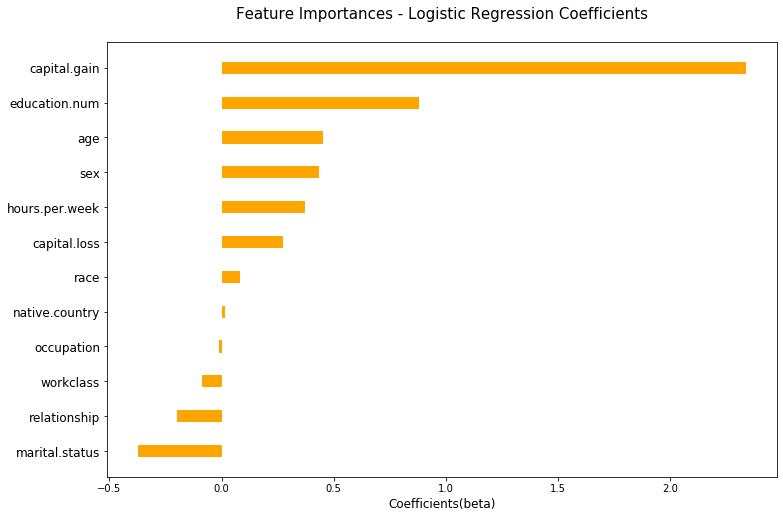

In [12]:
# Visualization

indices = np.argsort(coef)

plt.figure(figsize=(12,8))
plt.barh(X_test.columns, coef[indices],
         .35,
         color = 'orange',
         align = 'center')
plt.yticks(X_test.columns, X_test.columns[indices],
           fontsize=12)
plt.xlabel('Coefficients(beta)', fontsize = 12)
plt.title('Feature Importances - Logistic Regression Coefficients\n', 
          fontsize = 15)
plt.show()

## Checking the Feature importance [ Random Forest Classifier ]


In [13]:
with gzip.open(modelpath + 'data00_X_train.pickle',
               'rb') as f:
               x_train = pickle.load(f)
with gzip.open(modelpath + 'data00_X_test.pickle',
               'rb') as f:
               x_test = pickle.load(f)

In [14]:
# 기존의 방법은 모델을 불러오고 fitting을 시켜주었었음.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rfc = rf.fit(x_train, y_train)

In [15]:
# Save the model
pickle.dump(rfc , open(modelpath + 'rfc00.pkl', 'wb'))

In [16]:
# Load the model
with open(modelpath + 'rfc00.pkl', 'rb') as file :
    rf_model = pickle.load(file)

In [17]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [18]:
# Feature's importance 
importances = rf_model.feature_importances_
importances

array([0.2120391 , 0.04862643, 0.14503283, 0.05946474, 0.08394042,
       0.12762821, 0.01853742, 0.01328217, 0.12340054, 0.0394054 ,
       0.10993623, 0.0187065 ])

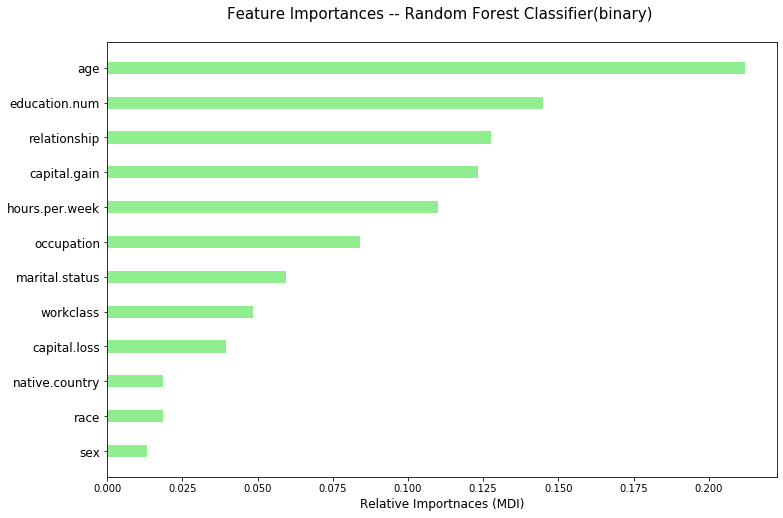

In [19]:
# Visualizing

indices = np.argsort(importances)

plt.figure(figsize=(12,8))
plt.barh(X_test.columns, importances[indices],
         .35,
         color = 'lightgreen',
         align = 'center')
plt.yticks(X_test.columns, X_test.columns[indices],
           fontsize=12)
plt.xlabel('Relative Importnaces (MDI)', fontsize = 12)
plt.title('Feature Importances -- Random Forest Classifier(binary) \n', 
          fontsize = 15)
plt.show()

In [20]:
# Eli5를 이용하여 Permutation importance 구하기

import eli5
from eli5.sklearn import PermutationImportance

imp = PermutationImportance(rf_model, random_state = 1).fit(x_test,y_test)
imp

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [21]:
# 피쳐 중요도 순서대로 확인
eli5.show_weights(imp,feature_names = X_test.columns.tolist())

Weight,Feature
0.0455 ± 0.0031,capital.gain
0.0279 ± 0.0072,relationship
0.0238 ± 0.0020,education.num
0.0121 ± 0.0062,age
0.0104 ± 0.0018,capital.loss
0.0103 ± 0.0051,occupation
0.0046 ± 0.0017,workclass
0.0044 ± 0.0047,hours.per.week
0.0016 ± 0.0022,marital.status
0.0007 ± 0.0018,sex


In [22]:
print(eli5.format_as_text(
    eli5.explain_weights(imp, feature_names = X_test.columns.tolist())
))

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.0455 ± 0.0031  capital.gain
0.0279 ± 0.0072  relationship
0.0238 ± 0.0020  education.num
0.0121 ± 0.0062  age
0.0104 ± 0.0018  capital.loss
0.0103 ± 0.0051  occupation
0.0046 ± 0.0017  workclass
0.0044 ± 0.0047  hours.per.week
0.0016 ± 0.0022  marital.status
0.0007 ± 0.0018  sex
0.0002 ± 0.0011  race
-0.0002 ± 0.0015  native.country


## Partial Dependence Plot
    피쳐의 수치를 선형적으로 변형하면서 알고리즘 해석 능력이 얼마나 증가하고 감소하는 지 관찰하는 기법
    

In [23]:
# preparing input binary data 

data00_prep = data00.drop(
    ['education','fnlwgt'],
    axis=1
    )

In [24]:
# numerically coding

from sklearn.preprocessing import LabelEncoder
categorical = ['income', 'workclass', 'marital.status','occupation','relationship','race','sex','native.country']
for feature in categorical :
    le = LabelEncoder()
    data00_prep[feature] = le.fit_transform(data00_prep[feature])
data00_prep.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,10,5,9,3,4,0,0,3900,40,38,0


In [25]:
# Input data

data = data00_prep
features = data00_prep.columns[:12]
target = data00_prep.columns[-1]

In [26]:
# Target Plot
from pdpbox import pdp, info_plots

In [27]:
# ex.) educaiton 변수 구분 확인
data00['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [28]:
data00['education.num'].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1])

In [32]:
a = pd.DataFrame(data00['education'].unique())
a.head()

,0
0,HS-grad
1,Some-college
2,7th-8th
3,10th
4,Doctorate


In [33]:
a.rename(columns = {
    0:'education'
},
inplace=True)
a.head()

,education
0,HS-grad
1,Some-college
2,7th-8th
3,10th
4,Doctorate


In [34]:
b = pd.DataFrame(data00['education.num'].unique())
b.rename(columns=
         {0 : 'education.num'},
         inplace=True)
b.head()

,education.num
0,9
1,10
2,4
3,6
4,16


In [35]:
c = pd.concat([a,b], axis=1)
c.head()

,education,education.num
0,HS-grad,9
1,Some-college,10
2,7th-8th,4
3,10th,6
4,Doctorate,16


In [36]:
c.sort_values('education.num')

,education,education.num
15,Preschool,1
11,1st-4th,2
12,5th-6th,3
2,7th-8th,4
14,9th,5
3,10th,6
8,11th,7
13,12th,8
0,HS-grad,9
1,Some-college,10


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


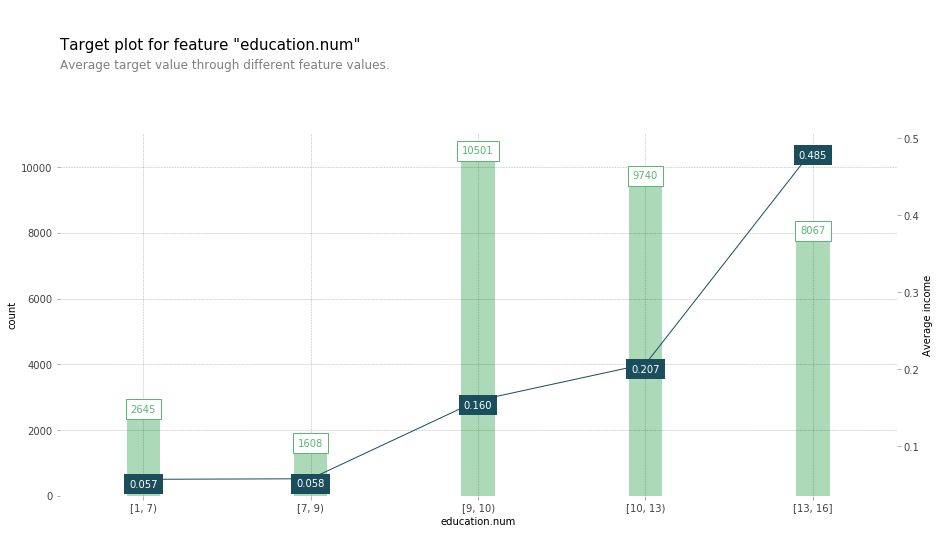

In [37]:
# 알고 싶은 변수가 education.num 일때 targetplot 시각화
fig, axes, summary_df = info_plots.target_plot(
    df = data,
    feature = 'education.num',
    feature_name = 'education.num',
    target = target
)

In [38]:
## 등급을 임의로 나눔
## EDA 수행이라고 볼 수 있음.

In [39]:
# target_plot의 summary 확인
summary_df

,x,display_column,value_lower,value_upper,count,income
0,0,"[1, 7)",1.0,7.0,2645,0.057089
1,1,"[7, 9)",7.0,9.0,1608,0.057836
2,2,"[9, 10)",9.0,10.0,10501,0.159509
3,3,"[10, 13)",10.0,13.0,9740,0.206674
4,4,"[13, 16]",13.0,16.0,8067,0.484567


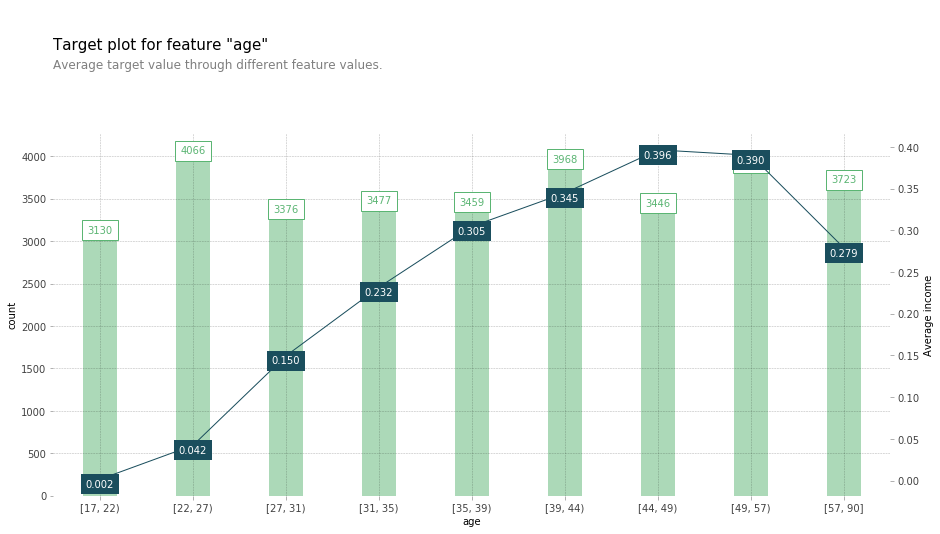

In [40]:
# 알고 싶은 변수가 age 일때 targetplot 시각화
fig, axes, summary_df = info_plots.target_plot(
    df = data,
    feature = 'age',
    feature_name = 'age',
    target = target
)

In [41]:
summary_df

,x,display_column,value_lower,value_upper,count,income
0,0,"[17, 22)",17.0,22.0,3130,0.001597
1,1,"[22, 27)",22.0,27.0,4066,0.042302
2,2,"[27, 31)",27.0,31.0,3376,0.149585
3,3,"[31, 35)",31.0,35.0,3477,0.231809
4,4,"[35, 39)",35.0,39.0,3459,0.304712
5,5,"[39, 44)",39.0,44.0,3968,0.344758
6,6,"[44, 49)",44.0,49.0,3446,0.396402
7,7,"[49, 57)",49.0,57.0,3916,0.389939
8,8,"[57, 90]",57.0,90.0,3723,0.278807


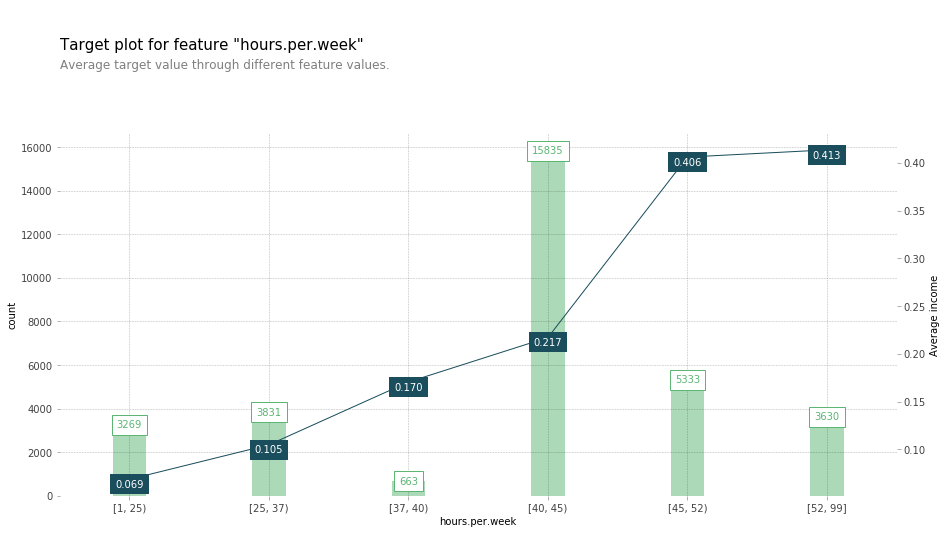

In [42]:
# 알고 싶은 변수가 hours.per.week 일때 targetplot 시각화
fig, axes, summary_df = info_plots.target_plot(
    df = data,
    feature = 'hours.per.week',
    feature_name = 'hours.per.week',
    target = target
)

In [43]:
summary_df

,x,display_column,value_lower,value_upper,count,income
0,0,"[1, 25)",1.0,25.0,3269,0.068522
1,1,"[25, 37)",25.0,37.0,3831,0.104672
2,2,"[37, 40)",37.0,40.0,663,0.170437
3,3,"[40, 45)",40.0,45.0,15835,0.217051
4,4,"[45, 52)",45.0,52.0,5333,0.405963
5,5,"[52, 99]",52.0,99.0,3630,0.413499


## 다중분류 Randomforest Feature 중요도 분석

In [44]:
# Load the data
with gzip.open(modelpath + 'data01.pickle', 'rb') as f:
    data01 = pickle.load(f)
with gzip.open(modelpath + 'data01_X_train.pickle', 'rb') as f:
    x_train = pickle.load(f)
with gzip.open(modelpath + 'data01_X_test.pickle', 'rb') as f:
    x_test = pickle.load(f)
with gzip.open(modelpath + 'data01_y_train.pickle', 'rb') as f:
    y_train01 = pickle.load(f)
with gzip.open(modelpath + 'data01_y_test.pickle', 'rb') as f:
    y_test01 = pickle.load(f)

In [45]:
rf1 = RandomForestClassifier().fit(x_train,y_train01)

In [46]:
x_test.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'spend.groc', 'spend.med', 'spend.trav', 'asset', 'balance',
       'native.country'],
      dtype='object')

In [47]:
importances = rf1.feature_importances_
importances

array([0.03909332, 0.01383342, 0.02423123, 0.01227137, 0.02617883,
       0.01432478, 0.00592339, 0.00686908, 0.00422924, 0.02753559,
       0.04916548, 0.05176127, 0.38979103, 0.05243048, 0.27492448,
       0.00743702])

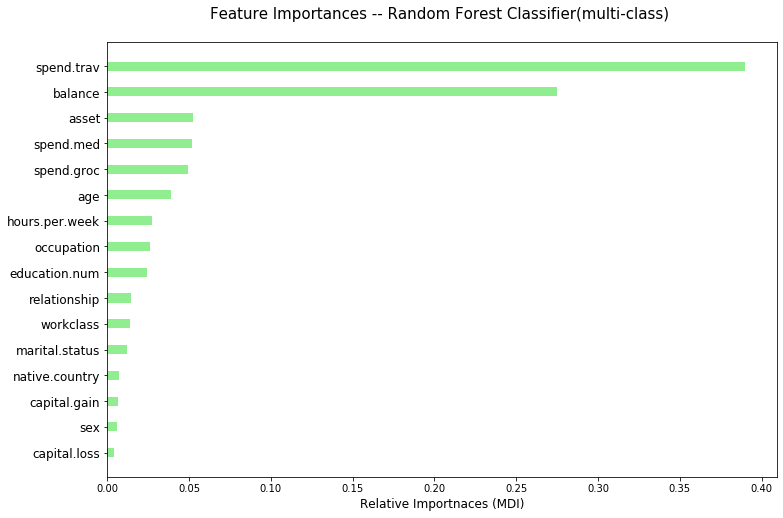

In [48]:
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(x_test.columns, importances[indices],
         .35,
         color = 'lightgreen',
         align = 'center')
plt.yticks(x_test.columns, x_test.columns[indices],
           fontsize=12)
plt.xlabel('Relative Importnaces (MDI)', fontsize = 12)
plt.title('Feature Importances -- Random Forest Classifier(multi-class) \n', 
          fontsize = 15)
plt.show()

## 다중분류 LGBM Feature 중요도 분석

In [50]:
with open(modelpath + 'lgbm01.pkl', 'rb') as file :
    lgbm1 = pickle.load(file)

In [51]:
importances = lgbm1.feature_importances_
importances

array([ 601,  170,  267,  123,  293,  155,   45,   84,   61,  350,  792,
        715, 5074, 1728, 4446,   96])

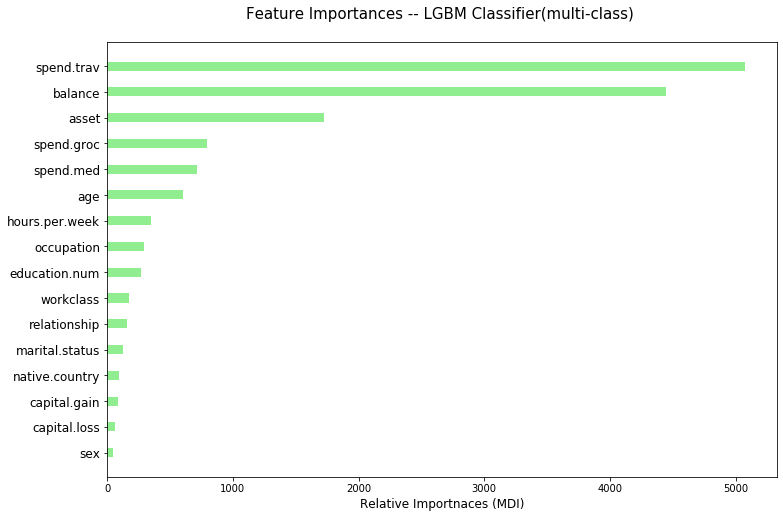

In [53]:
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(x_test.columns, importances[indices],
         .35,
         color = 'lightgreen',
         align = 'center')
plt.yticks(x_test.columns, x_test.columns[indices],
           fontsize=12)
plt.xlabel('Relative Importnaces (MDI)', fontsize = 12)
plt.title('Feature Importances -- LGBM Classifier(multi-class) \n', 
          fontsize = 15)
plt.show()

## 2 분류기 SUMMARY

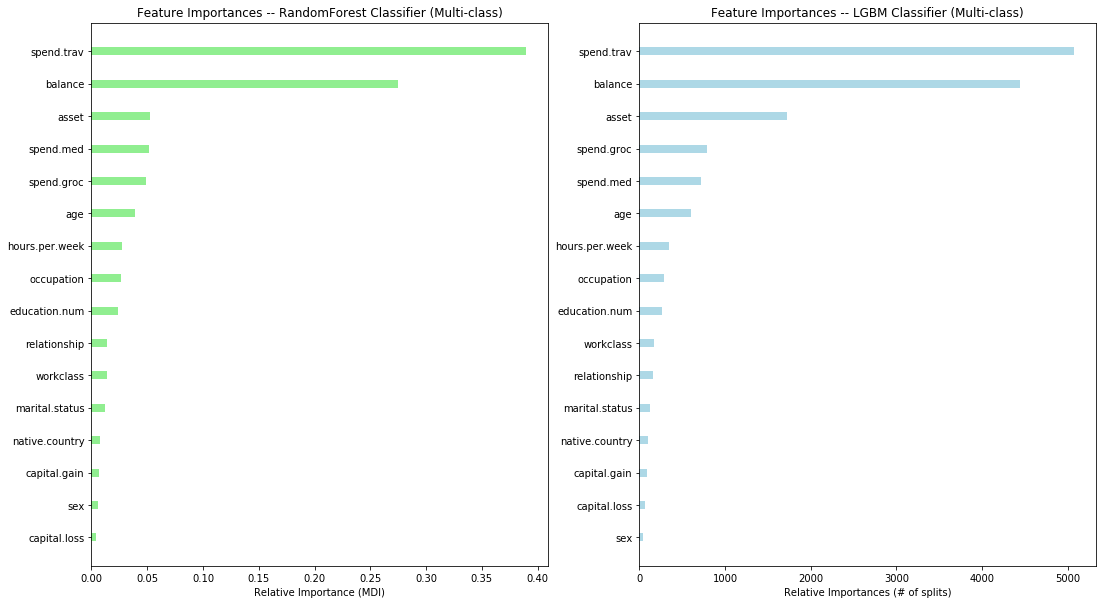

In [60]:
plt.figure(figsize=(18,10))

plt.subplot(121)

importances_rf = rf1.feature_importances_
indices_rf = np.argsort(importances_rf)
plt.title('Feature Importances -- RandomForest Classifier (Multi-class)')
plt.barh(x_test.columns, importances_rf[indices_rf],
         .25,
         color = 'lightgreen')
plt.yticks(x_test.columns, x_test.columns[indices_rf])
plt.xlabel('Relative Importance (MDI)\n')




plt.subplot(122)

importances_lgbm = lgbm1.feature_importances_
indices_lgbm = np.argsort(importances_lgbm)
plt.title('Feature Importances -- LGBM Classifier (Multi-class)')
plt.barh(x_test.columns, importances_lgbm[indices_lgbm],
         .25,
         color='lightblue')
plt.yticks(x_test.columns, x_test.columns[indices_lgbm])
plt.xlabel('Relative Importances (# of splits)')

plt.show()

## dd

## dd

## dd